In [1]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Clone or Pull latest code from Github
import os

# Go to /content to avoid nesting
%cd /content

REPO_NAME = "AI"
REPO_URL = f"https://github.com/limtengyeow/{REPO_NAME}.git"

if os.path.exists(REPO_NAME):
    print("Repo already exists. Pulling latest changes...")
    %cd {REPO_NAME}
    !git pull
else:
    print("Cloning fresh repo...")
    !git clone {REPO_URL}
    %cd {REPO_NAME}


/content
Repo already exists. Pulling latest changes...
/content/AI
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 1), reused 4 (delta 1), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), 134.45 KiB | 1.15 MiB/s, done.
From https://github.com/limtengyeow/AI
   30a40e9..6a23cdd  main       -> origin/main
Updating 30a40e9..6a23cdd
Fast-forward
 notebooks/main.ipynb | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [3]:
## Confirm the Project Directory
!pwd

/content/AI


In [4]:
## Install dependencies
!pip install -r requirements.txt

In [5]:
# Run Unit Tests FIRST
!python -m unittest discover -s tests



..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


In [6]:
# Generate Training Data
!python data_gen/generate_data.py --tickers-file data_gen/tickers.txt --interval 5min --start 2023-01-01 --end 2023-02-01


Fetching NVDA from 2023-01-01 to 2023-02-01...
Saved NVDA to data/NVDA_5min.csv
Fetching AAPL from 2023-01-01 to 2023-02-01...
Saved AAPL to data/AAPL_5min.csv
Fetching MSFT from 2023-01-01 to 2023-02-01...
Saved MSFT to data/MSFT_5min.csv
Fetching AMZN from 2023-01-01 to 2023-02-01...
Saved AMZN to data/AMZN_5min.csv


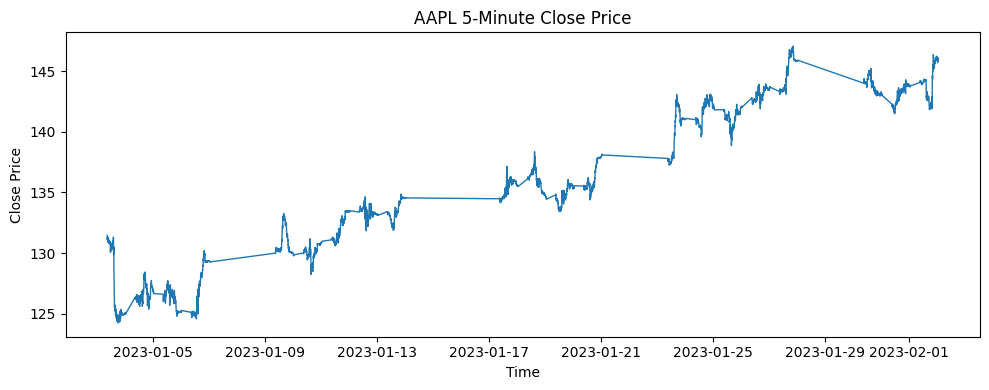

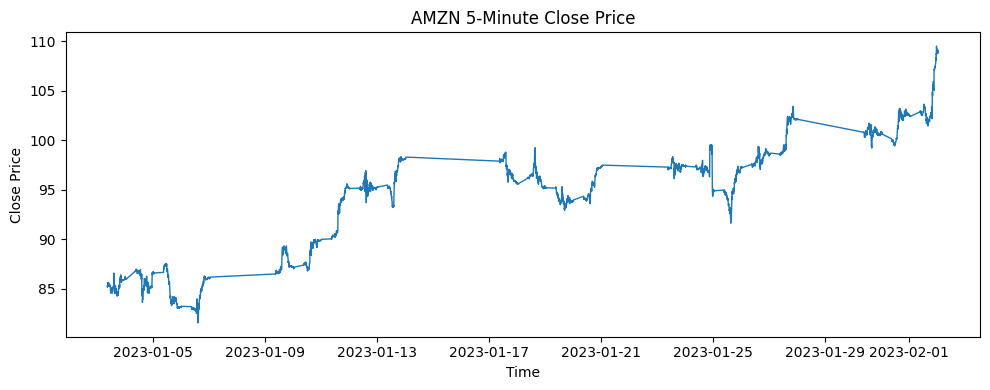

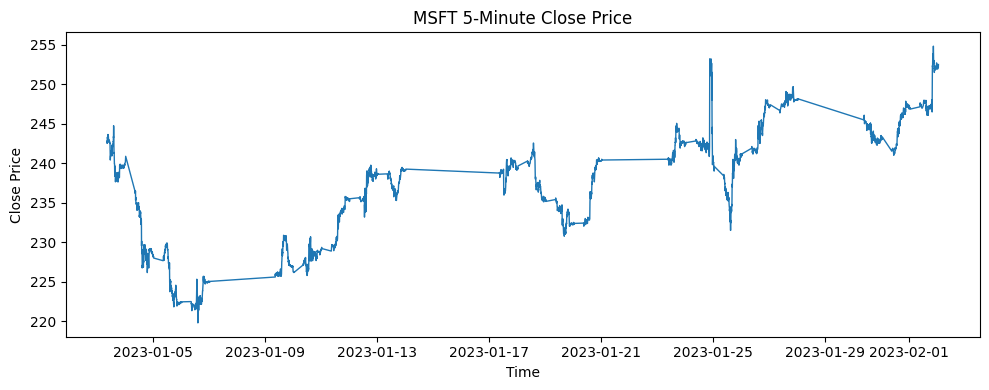

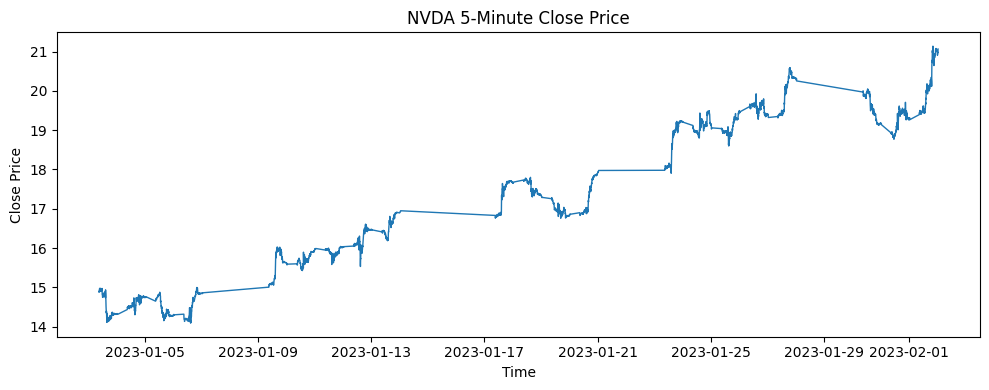

In [7]:
# ─── Plot all 5-min CSVs in data/ ─────────────────────────────────────────
import glob
import pandas as pd
import matplotlib.pyplot as plt

# 1. Grab every CSV matching *_5min.csv
csv_files = glob.glob("data/*_5min.csv")
if not csv_files:
    raise FileNotFoundError("No files found: data/*_5min.csv")

# 2. Loop and plot
for file_path in sorted(csv_files):
    # Load and parse time
    df = pd.read_csv(file_path, parse_dates=[0])
    df.set_index(df.columns[0], inplace=True)

    # Extract ticker from filename
    ticker = file_path.split("/")[-1].split("_")[0]

    # Create the figure
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df["close"], linewidth=1)
    plt.title(f"{ticker} 5-Minute Close Price")
    plt.xlabel("Time")
    plt.ylabel("Close Price")
    plt.tight_layout()
    plt.show()
# ──────────────────────────────────────────────────────────────────────────
